In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('password.csv',on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.shape

(669640, 2)

In [4]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

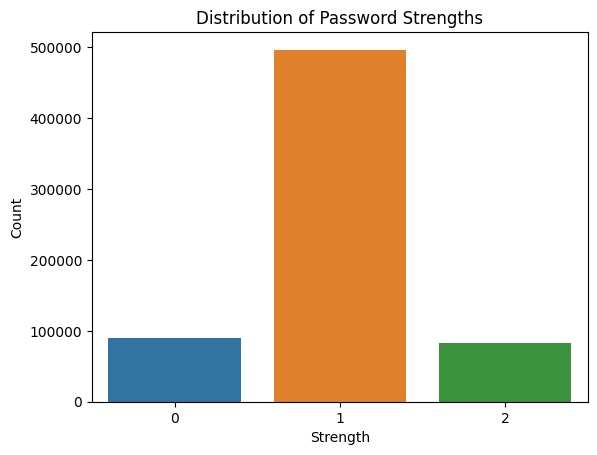

In [6]:
sns.countplot(x='strength', data=data)
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths')
plt.show()

In [7]:
x=np.array(data['password'])
y=np.array(data['strength'])

In [8]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character


In [9]:
tdif=TfidfVectorizer(tokenizer=word)
X= tdif.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape

(535711, 153)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model.score(X_test,y_test)

0.9559912788961233

In [13]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

In [14]:
usrpwd = "R1US!afx%@#834"
data = tdif.transform([usrpwd]).toarray()
pwd_strength = model.predict(data)

In [15]:
pwd_strength[0]

2

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17908
           1       0.96      0.99      0.97     99519
           2       0.96      0.91      0.93     16501

    accuracy                           0.96    133928
   macro avg       0.96      0.91      0.93    133928
weighted avg       0.96      0.96      0.96    133928



In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[14803  3100     5]
 [  629 98274   616]
 [   27  1517 14957]]
0.9559912788961233


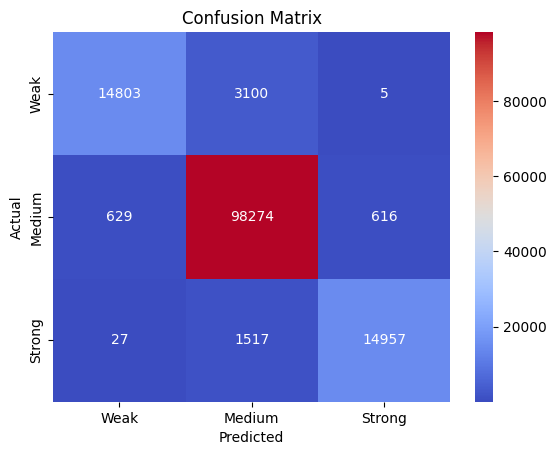

In [18]:
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
            xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()